## Financial Fraud Classifier
#### Sam Berkson and Ben Puryear
#### CPSC 322 Final Project

#### Data Preparation
First, we need to read in our dataset into our MyPyTable object.

In [123]:
import mysklearn.plot_utils as plot_utils
from mysklearn import myclassifiers, myevaluation, mypytable
import importlib
importlib.reload(plot_utils)

table = mypytable.MyPyTable()
table.load_from_file("input_data/Fraud_chop.csv")

path: /home/FinancialFraudClassifier/mysklearnmedia/


Next, we grab each column and put them into lists to be used throughout our EDA.

In [124]:

oldBalanceOrg = table.get_column("oldbalanceOrg")
newBalanceOrig = table.get_column("newbalanceOrig")
isFraud = table.get_column("isFraud")
isFlaggedFraud = table.get_column("isFlaggedFraud")
oldBalanceDest = table.get_column("oldbalanceDest")
newBalanceDest = table.get_column("newbalanceDest")
amount = table.get_column("amount")
type = table.get_column("type")

After getting all of our columns, we wanted to get more familiar with our attributes and any potential relationships between them.  To do this, we used matplotlib for various visualizations.  There isnt a particular rhyme or reason, this is mostly just to begin getting immersed in and used to our dataset.

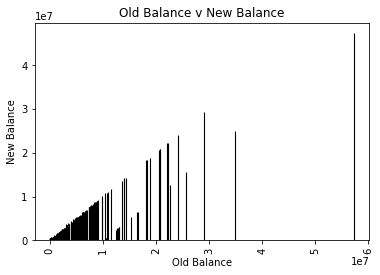

In [125]:
plot_utils.bar_chart_helper(oldBalanceOrg, newBalanceOrig, "Old Balance v New Balance", "Old Balance", "New Balance")

Slope = 0.6599852574644652


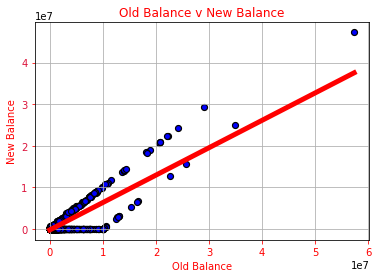

In [126]:
plot_utils.scatter_plot_helper(oldBalanceOrg, newBalanceOrig, "Old Balance v New Balance", "Old Balance", "New Balance")

Next, we wanted to evaluate the performance of the dataset's creator's classifier (isFlaggedFraud).  To do this, we find the number of transactions that were flagged as fradulent (while the remainder of instances are not flagged as fradulent).  Since we have an equal class distribution and a fixed number of instances, we can use these to evaluate the performance of the dataset's classifier.

In [127]:
isFlaggedFraudT = 0
isFlaggedFraudF = 0
isFraudT = 0
isFraudF = 0
correctlyPredicted = 0
incorrectlyPredicted = 0

for index, value in enumerate(isFlaggedFraud):
    if isFlaggedFraud[index] == 1:
        isFlaggedFraudT += 1
    else:
        isFlaggedFraudF += 1
        
    if isFraud[index] == 1:
        isFraudT += 1
    else:
        isFraudF += 1

    if isFlaggedFraud[index] == 1 and isFraud[index] == 1:
        correctlyPredicted += 1
    elif isFlaggedFraud[index] == 0 and isFraud[index] == 0:
        correctlyPredicted += 1
    else:
        incorrectlyPredicted += 1

flagPercentage = (100 / 1642) * isFlaggedFraudT    
print("isFlaggedFraudT:", isFlaggedFraudT)
print("isFlaggedFraudF:", isFlaggedFraudF)
print("isFraudT:", isFraudT)
print("isFraudF:", isFraudF)
print("Percentage of instances flagged as fradulent: ", flagPercentage, "%")
print("Number of instances correctly predicted: ", correctlyPredicted)
print("Number of instances incorrectly predicted: ", incorrectlyPredicted)
print("Accuracy: ", (100 / 1642) * correctlyPredicted)

isFlaggedFraudT: 3
isFlaggedFraudF: 1639
isFraudT: 821
isFraudF: 821
Percentage of instances flagged as fradulent:  0.18270401948842874 %
Number of instances correctly predicted:  824
Number of instances incorrectly predicted:  818
Accuracy:  50.18270401948843


In [128]:
avgOrgBalance = sum(oldBalanceDest)/len(oldBalanceDest)
avgNewBalance = sum(newBalanceDest)/len(newBalanceDest)
difference = avgOrgBalance - avgNewBalance

print("avgOrgBalance: $", avgOrgBalance)
print("avgNewBalance: $", avgNewBalance)
print("Average difference: $", difference)

avgOrgBalance: $ 833508.1312484784
avgNewBalance: $ 1304552.5530755178
Average difference: $ -471044.42182703933


In [129]:
avgTransfer = sum(amount)/len(amount)
print("Average transfer: $", avgTransfer)

Average transfer: $ 843594.1616077956


In [130]:
uniqueTypes = []
for index, value in enumerate(type):
    if value not in uniqueTypes:
        uniqueTypes.append(value)

In [131]:
print("Number of instances: ", isFraudT + isFraudF)
print("Number of fraudulent transactions:", isFraudT)
print("Number of non-fraudulent transactions:", isFraudF)
print("Number of fraudulent transactions flagged:", isFlaggedFraudT)
print("Number of non-fraudulent transactions flagged:", isFlaggedFraudF)
print("Average original balance:", avgOrgBalance)
print("Average new balance:", avgNewBalance)
print("Difference between original and new balance:", difference)
print("Average transfer amount:", avgTransfer)
print("Number of transaction types:", len(uniqueTypes))

Number of instances:  1642
Number of fraudulent transactions: 821
Number of non-fraudulent transactions: 821
Number of fraudulent transactions flagged: 3
Number of non-fraudulent transactions flagged: 1639
Average original balance: 833508.1312484784
Average new balance: 1304552.5530755178
Difference between original and new balance: -471044.42182703933
Average transfer amount: 843594.1616077956
Number of transaction types: 5


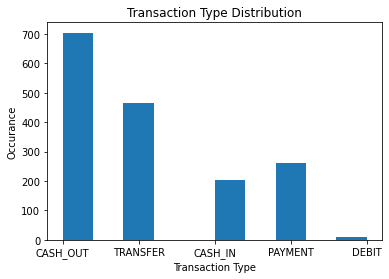

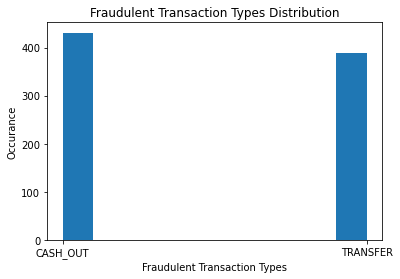

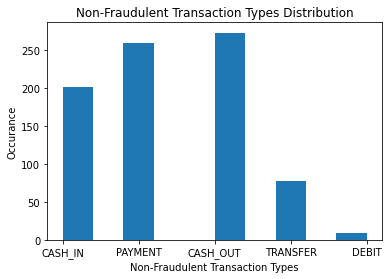

In [132]:
plot_utils.plot_histogram(type, "Transaction Type", "Transaction Type Distribution")

# Group transaction types by whether they are fradulent or not
fraudTypes = []
nonFraudTypes = []
for index, value in enumerate(type):
    if isFraud[index] == 1:
        fraudTypes.append(value)
    else:
        nonFraudTypes.append(value)

# Plot the distribution of fraudulent and non-fraudulent transaction types
plot_utils.plot_histogram(fraudTypes, "Fraudulent Transaction Types", "Fraudulent Transaction Types Distribution")
plot_utils.plot_histogram(nonFraudTypes, "Non-Fraudulent Transaction Types", "Non-Fraudulent Transaction Types Distribution")

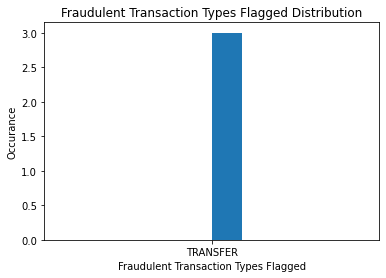

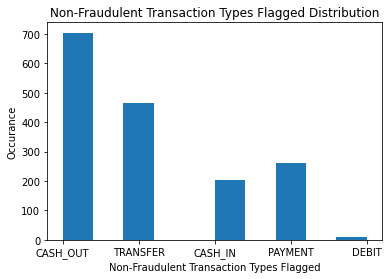

In [133]:
# Group transaction types by whether they are flagged fraudulent or not
fraudFlaggedTypes = []
nonFraudFlaggedTypes = []
for index, value in enumerate(type):
    if isFlaggedFraud[index] == 1:
        fraudFlaggedTypes.append(value)
    else:
        nonFraudFlaggedTypes.append(value)

plot_utils.plot_histogram(fraudFlaggedTypes, "Fraudulent Transaction Types Flagged", "Fraudulent Transaction Types Flagged Distribution")
plot_utils.plot_histogram(nonFraudFlaggedTypes, "Non-Fraudulent Transaction Types Flagged", "Non-Fraudulent Transaction Types Flagged Distribution")

In [134]:
# Group by transaction type
typesCounts = [[uniqueTypes], []]

    

